In [315]:
import numpy as np
import pandas as pd

## Importing Datasets

In [317]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [318]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [319]:
df.shape

(271116, 15)

In [320]:
# df1 consists of only summer season
df1 = df[df['Season'] == 'Summer']

In [321]:
df1.shape

(222552, 15)

In [322]:
# with the help of noc we can get region
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


## Merging both Datasets

In [324]:
df2 = df1.merge(region_df, on='NOC', how= 'left')   

In [325]:
df2.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [326]:
df2['region'].value_counts()

region
USA            15064
Germany        12377
UK             10917
France         10633
Russia          8855
               ...  
Kiribati          11
Brunei            10
Timor-Leste        8
Kosovo             8
South Sudan        3
Name: count, Length: 205, dtype: int64

In [327]:
# missing data
df2.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [328]:
# duplicate rows
df2.duplicated().sum()

1385

In [329]:
# dropping duplicate rows
df2.drop_duplicates(inplace=True)

In [330]:
df2.duplicated().sum()

0

In [331]:
df2['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [332]:
pd.get_dummies(df2['Medal']).head()

,Bronze,Gold,Silver
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [333]:
df3 = pd.concat([df2, pd.get_dummies(df2['Medal'])], axis = 1)

In [334]:
df3.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False


In [335]:
df3.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index().head()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454


In [336]:
medal_tally = df3.drop_duplicates(subset= ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [337]:
medal_tally1 = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_tally1.head()

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287


In [338]:
medal_tally1['total'] = medal_tally1['Gold'] + medal_tally1['Silver'] + medal_tally1['Bronze'] 
medal_tally1.head()

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777


In [339]:
df3['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [340]:
year = df3['Year'].unique().tolist()
year.sort()

In [341]:
year.insert(0, 'Overall')      

In [342]:
year

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [343]:
country = np.unique(df3['region'].dropna().values).tolist()
country.sort()

In [344]:
country.insert(0, 'Overall')

In [345]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

## Medal Tally Function

In [347]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset= ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]
    if flag == 1:
        temp_df = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        temp_df = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
        
    temp_df['total'] = temp_df['Gold'] + temp_df['Silver'] + temp_df['Bronze'] 
    print(temp_df)
    

In [348]:
medal_df = df3.drop_duplicates(subset= ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
medal_df.head() 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [349]:
# fetch_medal_tally(df3,'Overall', 'Overall')
fetch_medal_tally(df3,'Overall', 'India')
# fetch_medal_tally(df3,2016, 'Overall')
# fetch_medal_tally(df3,2016, 'India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


### Medal Tally is complete

# Overall Analysis start

In [352]:
# no. of editions
df3['Year'].unique().shape[0] -1

28

In [353]:
# no. of cities
df3['City'].unique().shape

(23,)

In [354]:
# No. of sports
df3['Sport'].unique().shape

(52,)

In [355]:
# No. of events
df3['Event'].unique().shape

(651,)

In [356]:
# No. of athletes
df3['Name'].unique().shape

(116122,)

In [357]:
# participating nations
df3['region'].unique().shape[0]

206

# Plotting

In [359]:
nations_over_time = df3.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.head()

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22


In [360]:
nations_over_time.rename(columns={'Year':'Edition', 'count':'No. of Countries'}, inplace= True)

In [361]:
import plotly.express as px

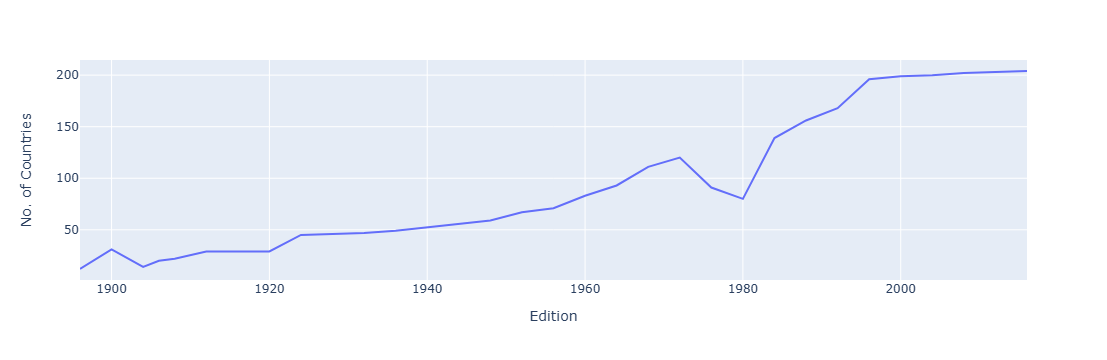

In [362]:
fig = px.line(nations_over_time, x= 'Edition', y= 'No. of Countries')
fig.show()

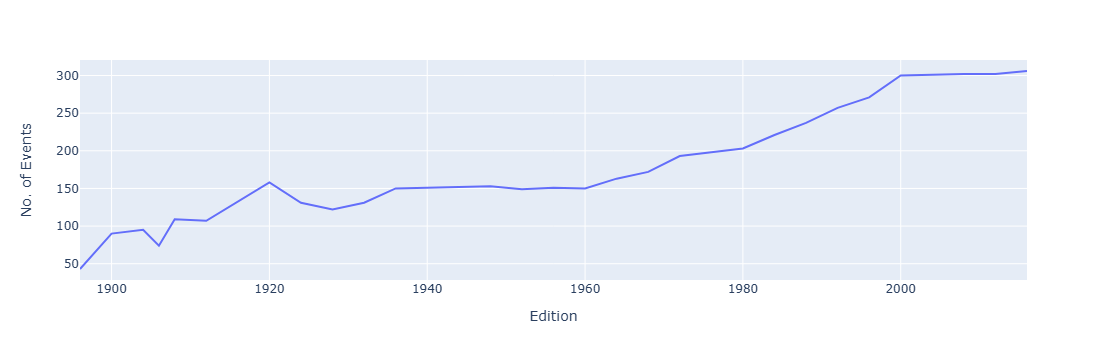

In [363]:
events_over_time = df3.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')
events_over_time.rename(columns={'Year':'Edition', 'count':'No. of Events'}, inplace= True)
fig = px.line(events_over_time, x= 'Edition', y= 'No. of Events')
fig.show()

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

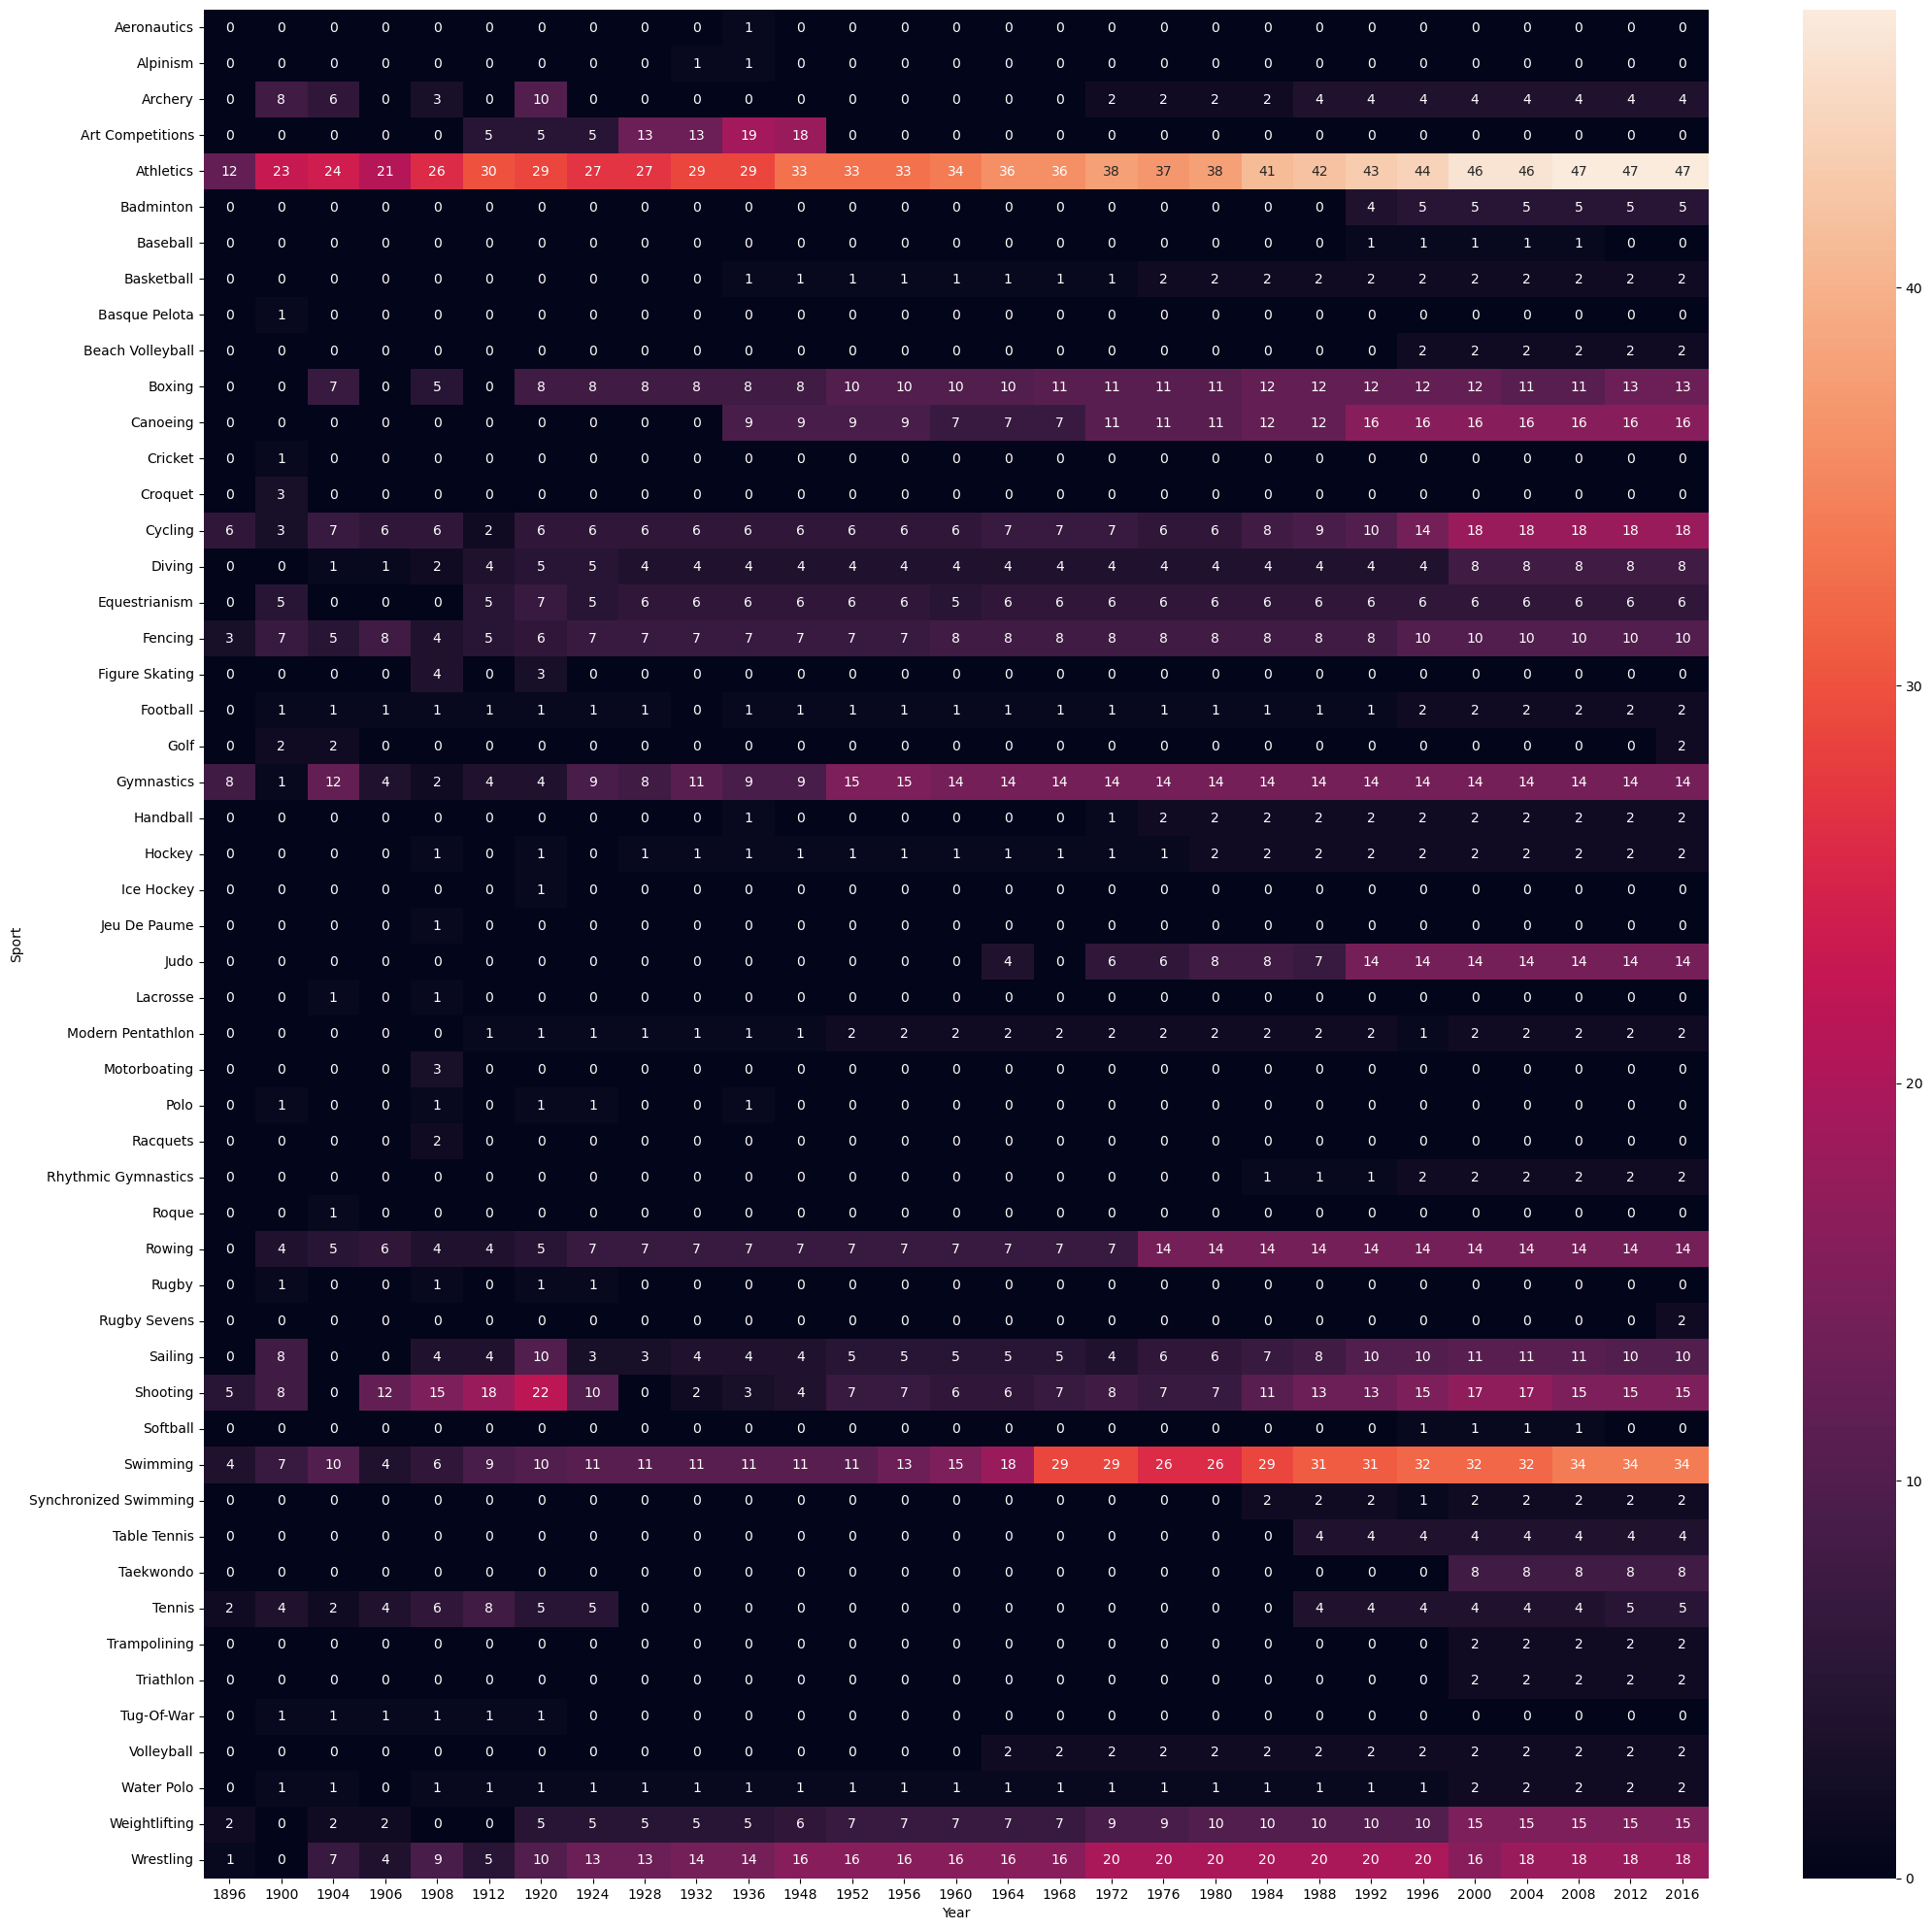

In [365]:
plt.figure(figsize=(25,25))
sns.heatmap(pd.pivot_table(df3, index='Sport', columns='Year', values='Event', aggfunc=pd.Series.nunique).fillna(0).astype('int'), annot = True)

In [366]:
x = df3.drop_duplicates(['Year','Event','Sport'])

## Successful Athletes in Olympics

In [368]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df3,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'}, inplace=True)
    return x

In [369]:
most_successful(df3, 'Overall').head()

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan


# Country-wise Analysis

* Countrywise medal tally per year(line plot)
* What countries are good at heamap
* most successful athletes (Top 10)

In [372]:
# those who having nan medal no need
temp_df = df3.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

In [373]:
new_df = temp_df[temp_df['region']=='USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

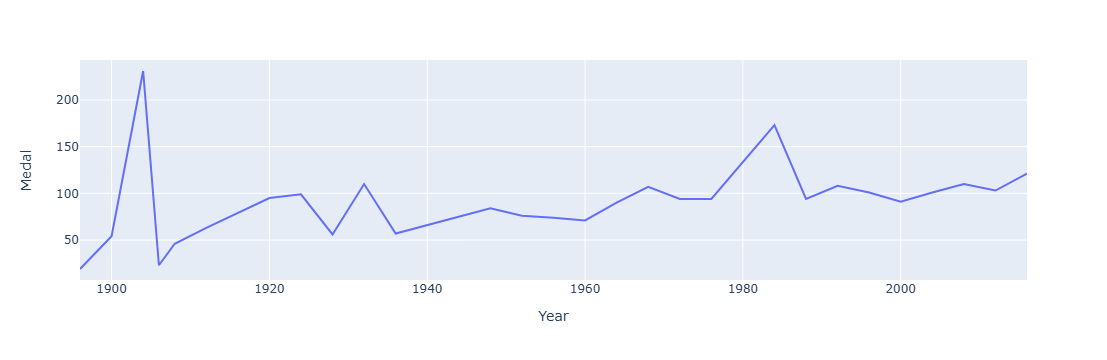

In [374]:
fig = px.line(final_df, x= 'Year', y= 'Medal')
fig.show()

# Now we are creating a heatmap for seeing which country is good in which sport

<Axes: xlabel='Year', ylabel='Sport'>

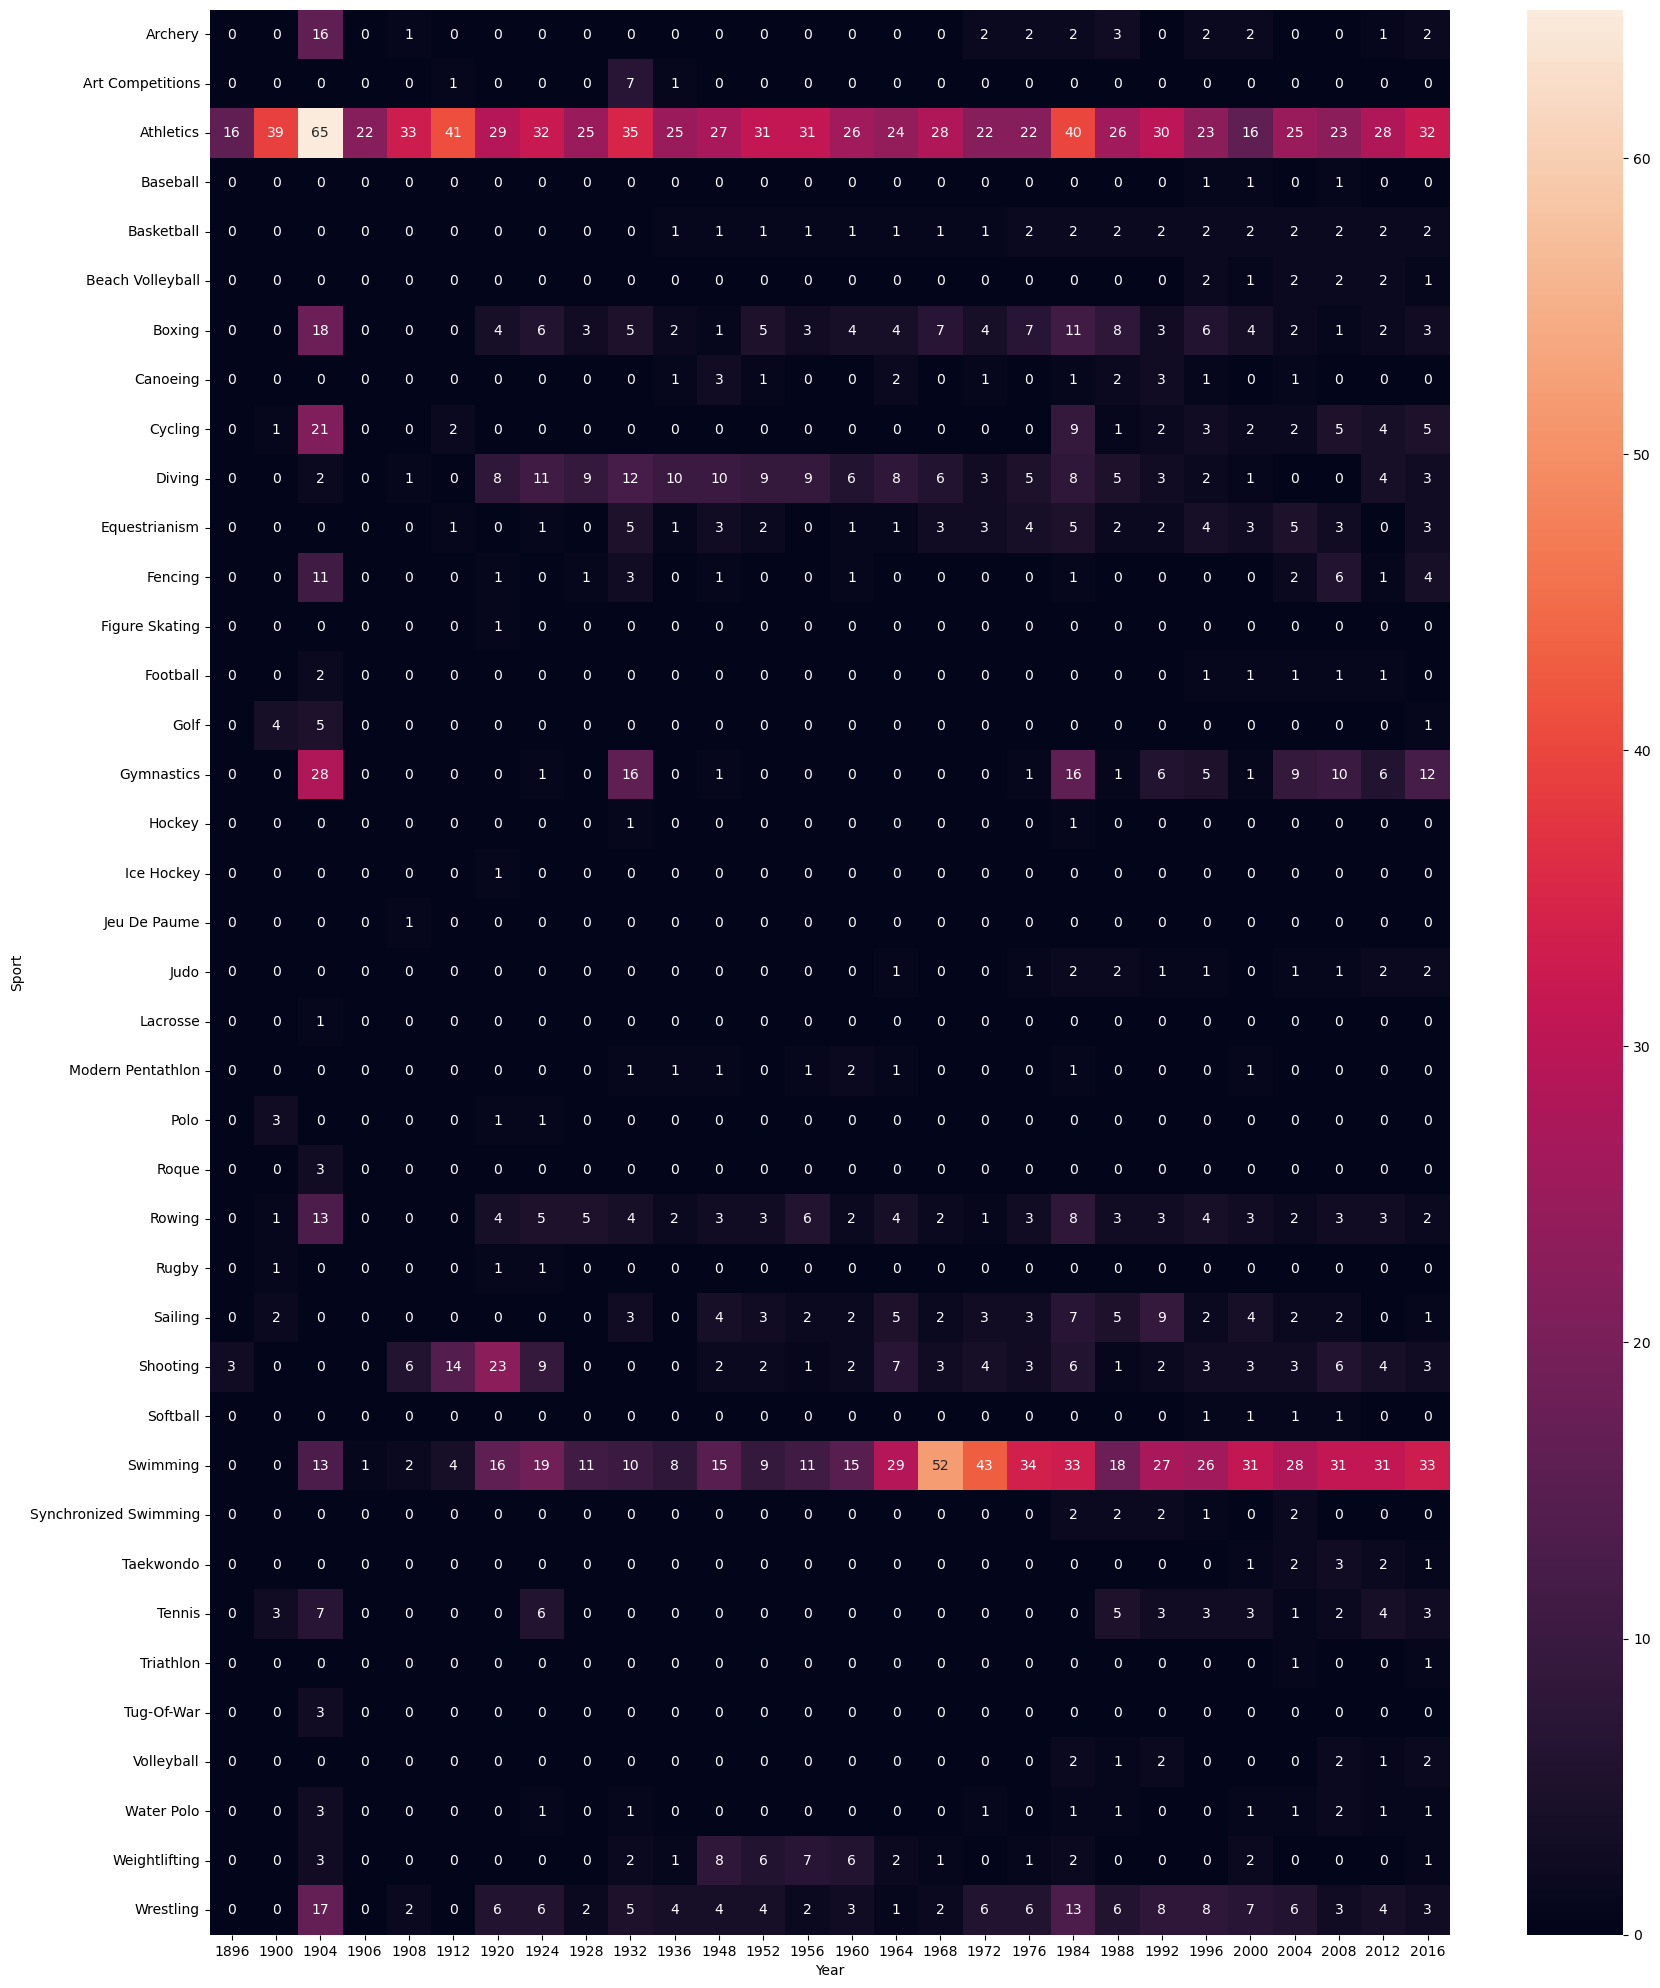

In [376]:
# For particular countrywise sport
new_df = temp_df[temp_df['region']=='USA']
plt.figure(figsize=(20,25))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0), annot=True)

<Axes: xlabel='Year', ylabel='Sport'>

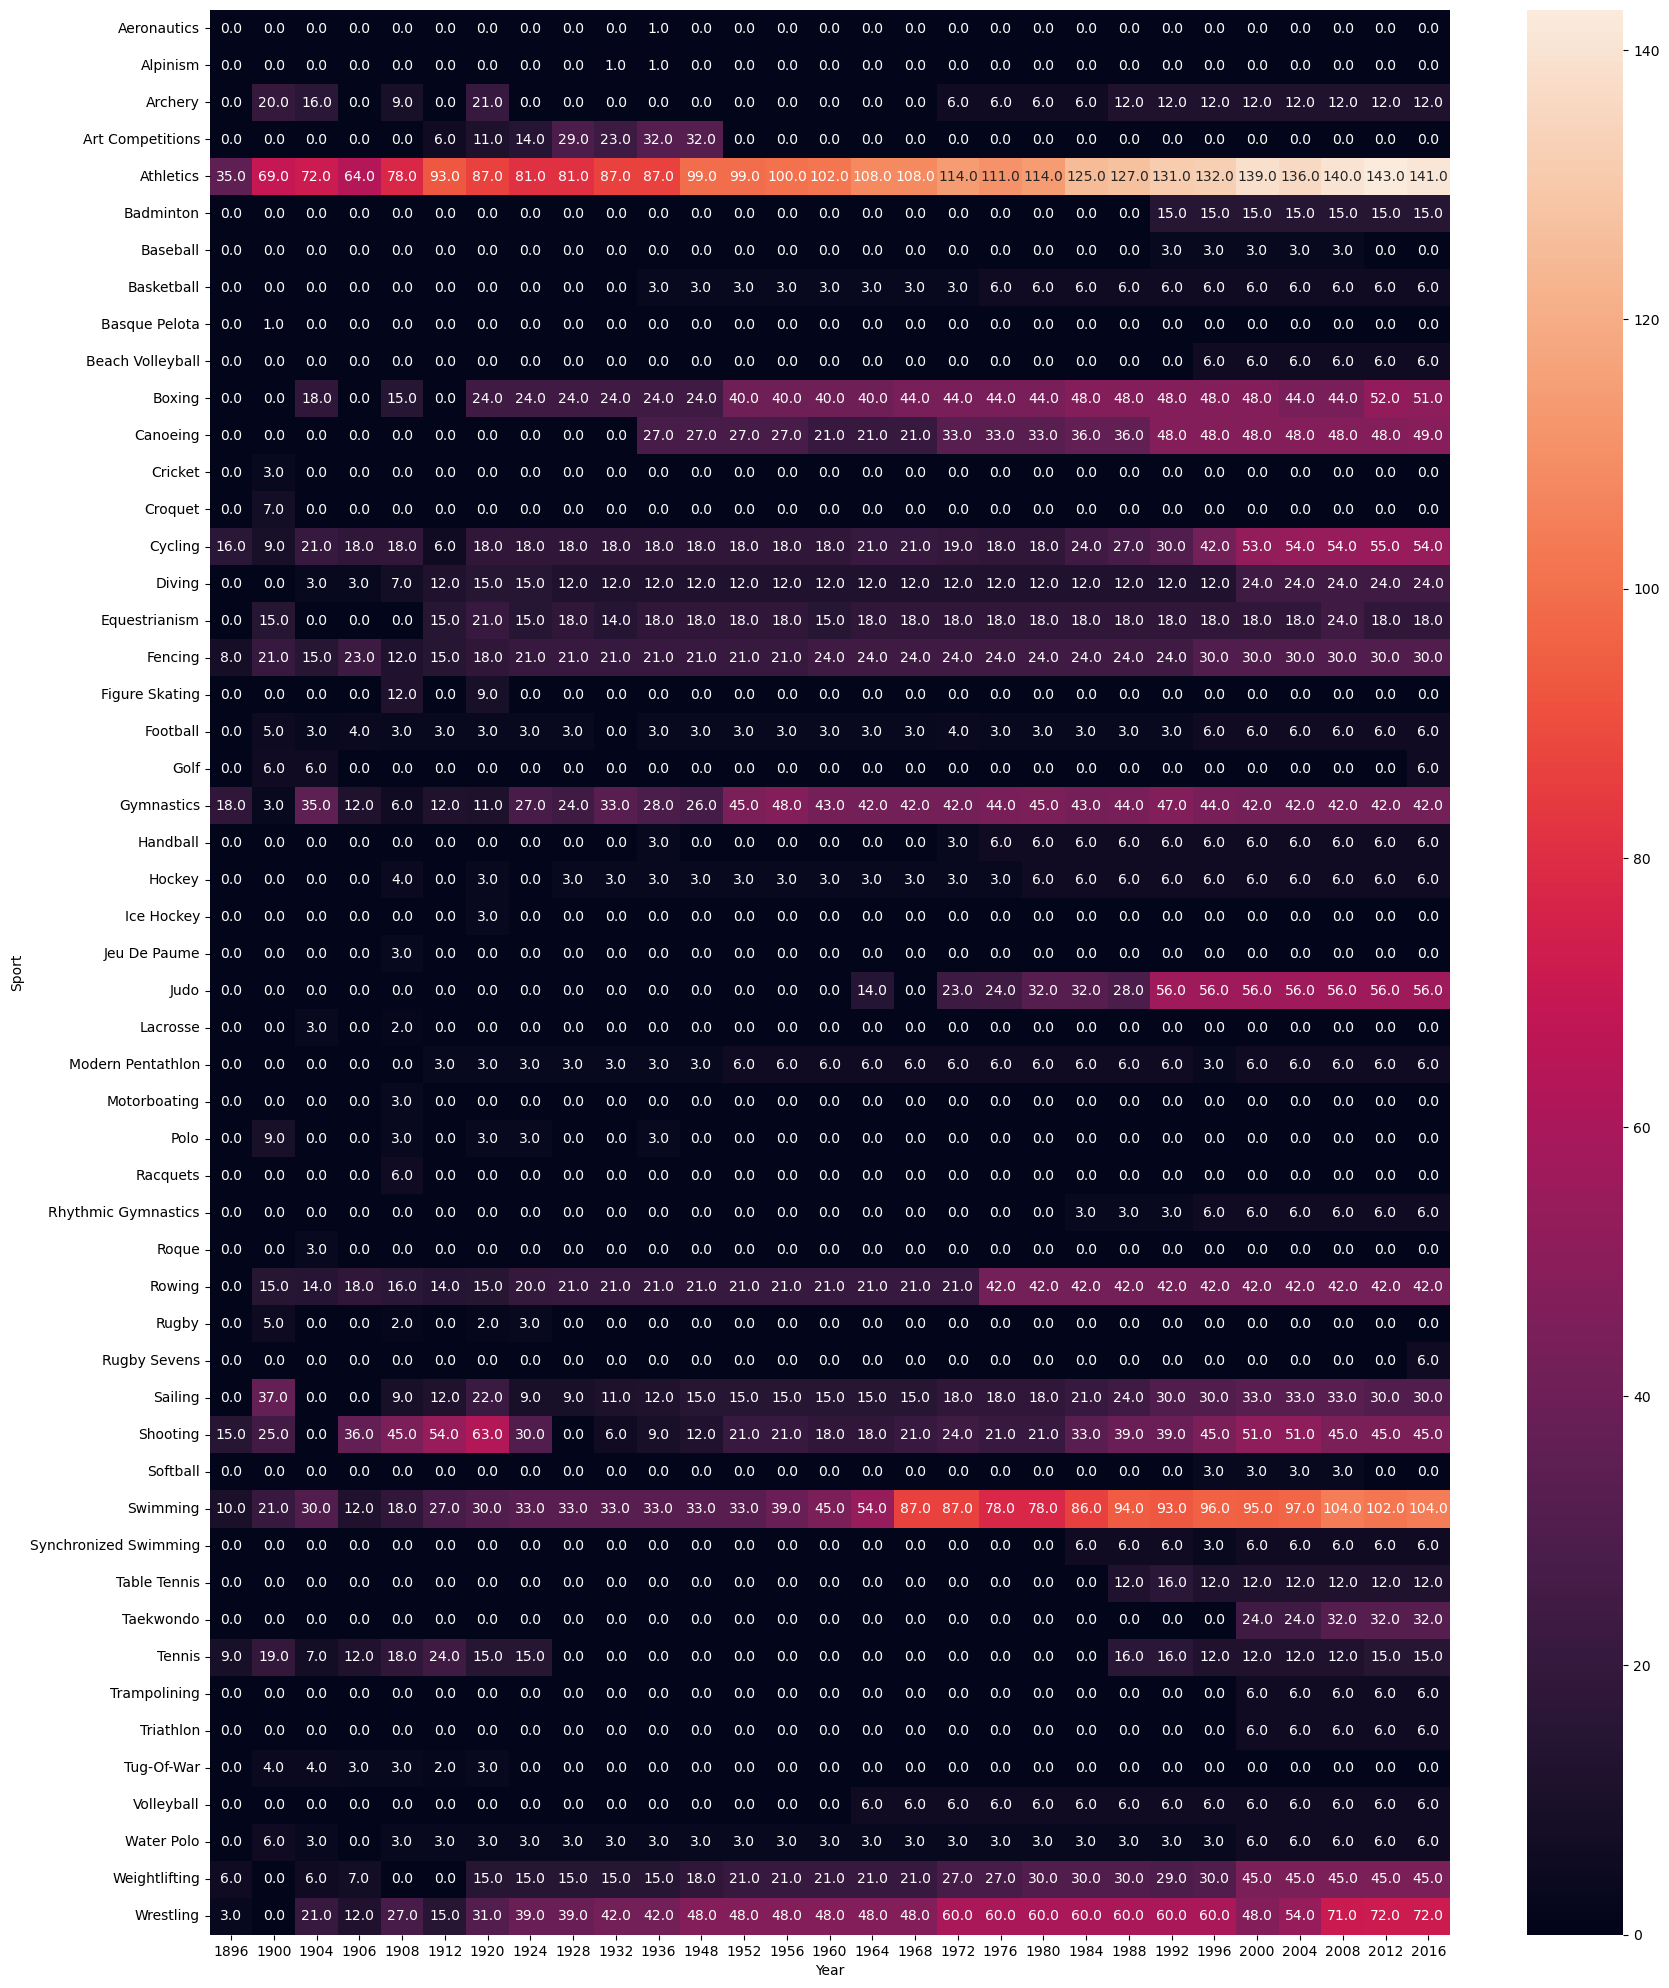

In [377]:
# For overall sport
pt = temp_df.pivot_table(index='Sport', columns='Year', values='Medal', fill_value=0, aggfunc='count')
plt.figure(figsize=(20,25))
sns.heatmap(pt, annot = True, fmt=".1f")

In [378]:

region_grouped = temp_df.groupby('region').count().reset_index().head(134)
pd.set_option('display.max_rows', 134)
region_grouped.head(134)
# region_grouped[region_grouped['region'] == 'Albania']
# many regions dont have any value so by hardcore values i am removing them from list & passing only valid regions
region_list = region_grouped['region'].dropna().unique().tolist()
region_list

['Afghanistan',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burundi',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Individual Olympic Athletes',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Malaysia',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Morocco'

# Most Successful Players in a country

In [380]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])

    if country != 'Overall':
        temp_df = temp_df[temp_df['region'] == country]
    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, left_on='Name', right_on='Name', how='left')[
        ['Name', 'count', 'Sport']].drop_duplicates('Name')

    x.rename(columns={'count': 'Medals'}, inplace=True)
    return x

In [381]:
most_successful(df3, 'Jamaica')

,Name,Medals,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
56,"Herbert Henry ""Herb"" McKenley",4,Athletics
62,Arthur Stanley Wint,4,Athletics
68,Novlene Hilaire Williams-Mills,4,Athletics
75,Yohan Blake,4,Athletics
81,Sherone Anmarica Simpson,3,Athletics


# Athlete-wise Analysis

In [383]:
df3.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [384]:
# we have duplicate athlete names since they played for multiple times
athlete_df = df3.drop_duplicates(subset= ['Name', 'region'])

In [385]:
# dropping missing age na values
athlete_df['Age'].dropna()

0         24.0
1         23.0
2         24.0
3         34.0
4         18.0
          ... 
222544    19.0
222546    23.0
222548    21.0
222549    24.0
222551    33.0
Name: Age, Length: 110734, dtype: float64

In [386]:
import plotly.figure_factory as ff

## Age Distribution

In [388]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()


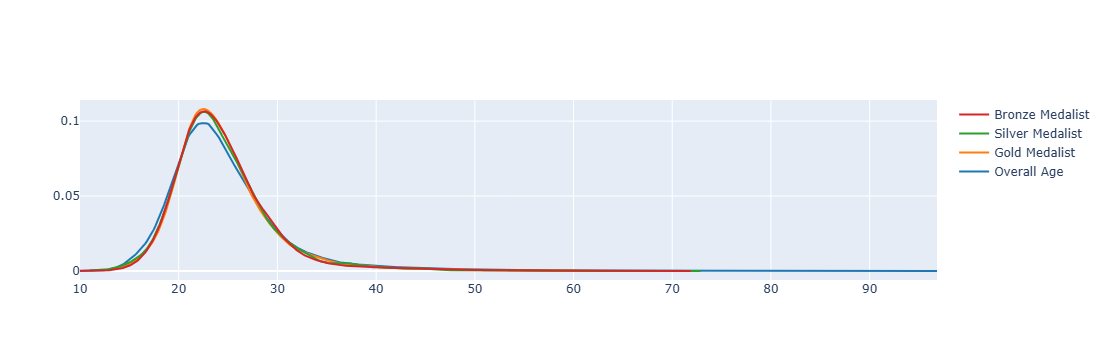

In [389]:
fig = ff.create_distplot([x1,x2,x3,x4], ['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'], show_hist=False, show_rug=False)
fig.show()

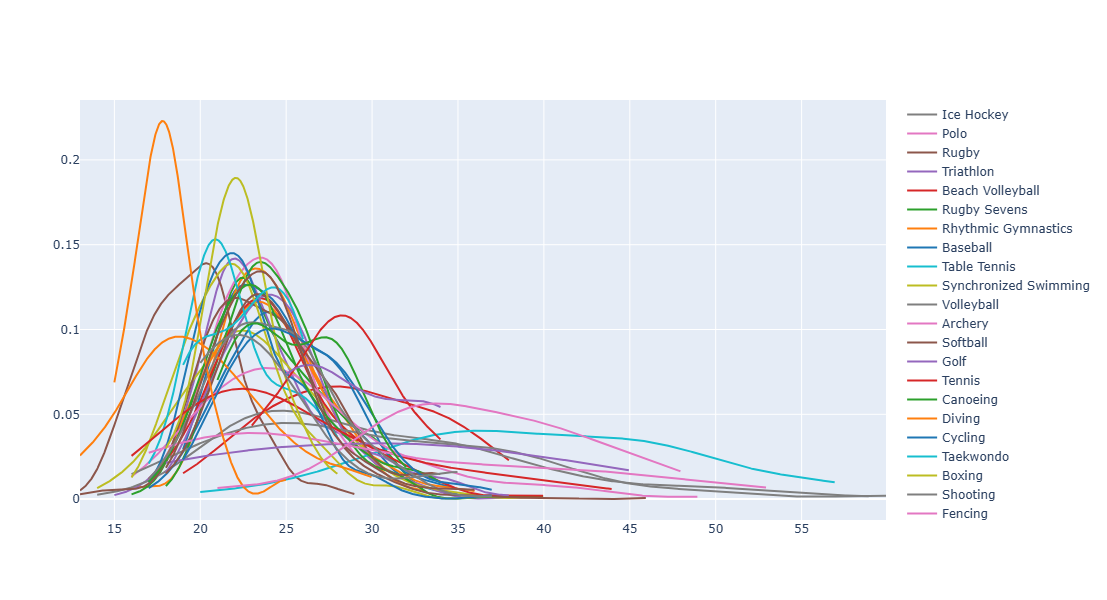

In [390]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo',
                     'Ice Hockey']

for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())      # x contains age
    name.append(sport)      # name contains sports name

fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(autosize= False, width=1000, height=600)
fig.show()

## Height vs Weight plot

In [392]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

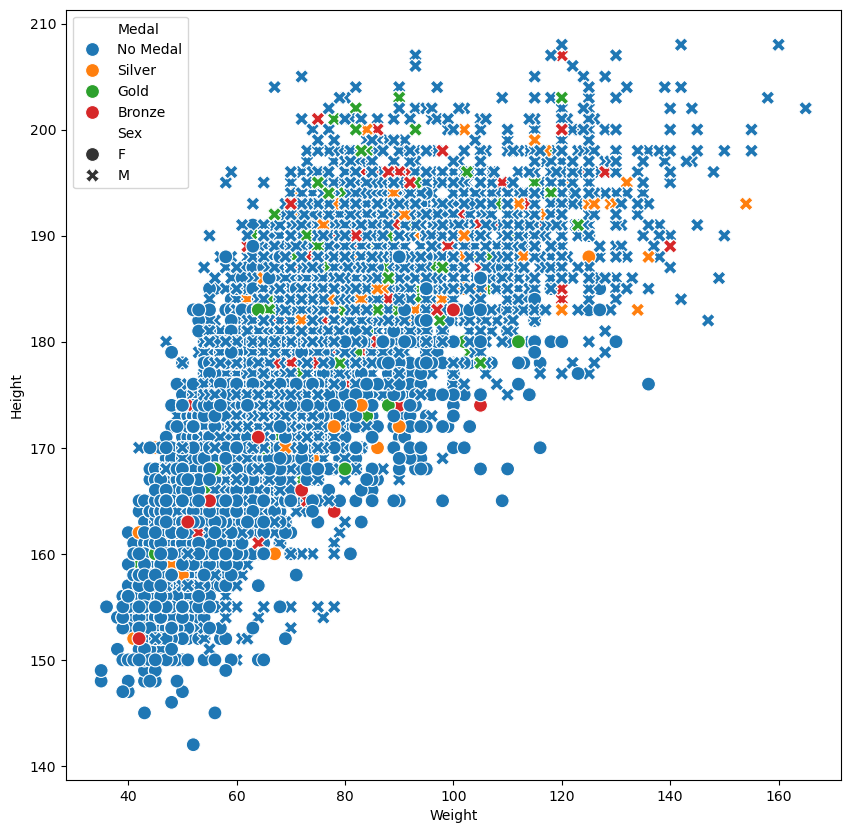

In [393]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']

sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'], hue=temp_df['Medal'], style=temp_df['Sex'], s=100)

In [394]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [395]:
final = men.merge(women, on= 'Year', how='left')
final.rename(columns={'Name_x':'Male', 'Name_y':'Female'}, inplace=True)
final.head()

,Year,Male,Female
0,1896,174,NaN
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0


In [396]:
final.fillna(0, inplace=True)
final.head()

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0


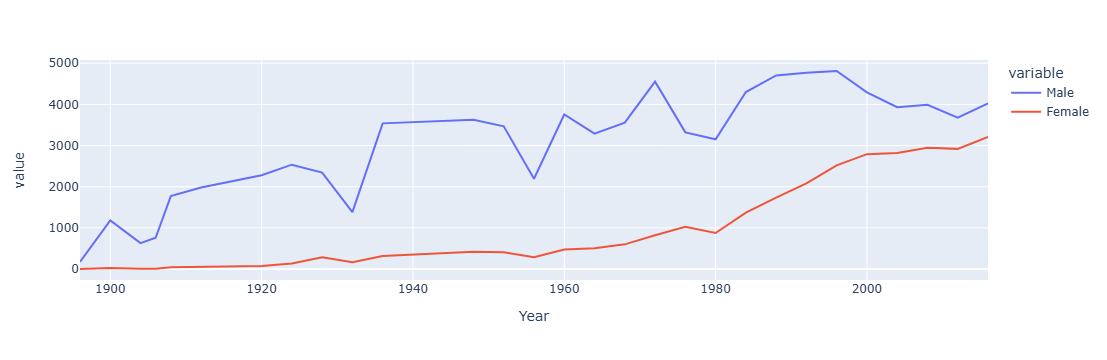

In [397]:
fig = px.line(final, x= 'Year', y = ['Male', 'Female'])
fig.show()